# Aplikacije
V projektni nalogi sem zajela podatke o 1500 aplikacijah na seznamu aplikacij z največ prenosi na spletni strani http://www.androidrank.org/. 
Zajela sem naslednje podatke o posameznih aplikacijah:
- ime aplikacije
- proizvajalec
- kategorija
- cena
- število ocen
- ocena
- število prenosov

V tej nalogi bom:
- primerjala cene aplikacij,
- ugotovila katera aplikacija je najbolj priljubljena,
- primerjala uspešnost posameznih proizvajalcev,
- ugotovila katere kategorije so najbolj priljubljene,
- poiskala povezavo med oceno, številom ocen in številom prenosov.

In [32]:
# naložimo paket
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.mpl_style', 'default')

aplikacije = pd.read_csv('aplikacije.csv', index_col='ime')
ocene = pd.read_csv('ocene.csv', index_col='ime')
nadkategorije = pd.read_csv('nadkategorije.csv')
pd.options.display.max_rows = 20

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


Najprej si v spodnjih tabelah oglejmo s katerimi podatki bomo delali.

In [33]:
aplikacije.sort_values('ocena')

,proizvajalec,kategorija,cena,stevilo_ocen,ocena,prenosi
ime,,,,,,
Blurb Checkout,Blurb Inc.,Photography,Free,202449,1.521,100000000
Briefing for Samsung (Update),Flipboard,News and Magazines,Free,23486,2.794,50000000
Beaming Service for Samsung,Mobeam Inc.,Productivity,Free,95396,2.862,100000000
Verizon Tones,Verizon - VZ,Entertainment,Free,36804,2.958,50000000
ANT+ Plugins Service,ANT+,Health and fitness,Free,86260,3.214,100000000
AfreecaTV (Korean),AfreecaTV,Video Players,Free,378059,3.240,10000000
Xray Scanner Prank,porrassoft,Entertainment,Free,316834,3.303,10000000
Winter Craft 3: Mine Build,SandStorm Earl,Arcade,Free,299144,3.392,10000000
Google Korean Input,Google Inc.,Tools,Free,59636,3.398,50000000


In [34]:
nadkategorije

,kategorija,nadkategorija
0,Books and Reference,Books and Reference
1,Business,Business
2,Comics,Comics
3,Communication,Communication
4,Education,Education
5,Entertainment,Entertainment
6,Finance,Finance
7,Health and fitness,Health and fitness
8,Libraries and Demo,Libraries and Demo
9,Lifestyle,Lifestyle


In [35]:
ocene

,ocena1,ocena2,ocena3,ocena4,ocena5
ime,,,,,
Nimbuzz Messenger / Free Calls,242746,75198,40631,16154,28291
Adhan Time / Holy Quran Pro,337862,36097,10449,5343,14138
+HOME Launcher,171479,40608,22128,9113,16336
100 Balls - Catch The Balls,113900,54661,49499,28671,43248
101 Yüzbir Okey Plus,1709007,51105,21600,11506,55034
101-in-1 Games,635659,222288,82424,13542,23823
1010! Puzzle,235432,69911,31780,13292,23430
1Weather:Widget Forecast Radar,321883,102558,19826,7730,10868
2048 Number puzzle game,905862,256870,101960,42926,65989


## Cene aplikacij
Sedaj pa si poglejmo, kakšne so cene posameznih aplikacij.

In [36]:
cena = aplikacije.groupby('cena').size().sort_values(ascending=False)
cena

cena
Free     1499
$7.22       1
dtype: int64

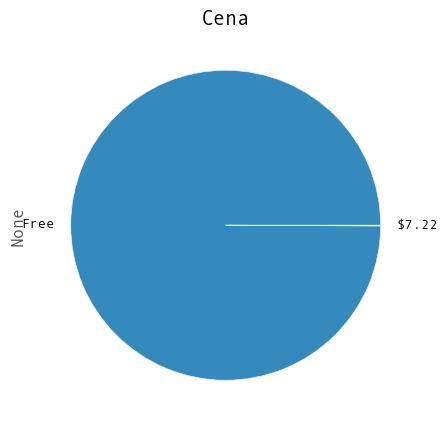

In [151]:
cena.plot(kind ='pie', figsize =(5,5), title = "Cena")

Malce presenetljivo je le ena od prvih 1500 največkrat prenešenih aplikacij plačljiva, in sicer je njena cena 7.22$, vseh ostalih 1499 pa je brezplačnih.

Ker so vse aplikacije razen 1 brezplačne aplikacij nima smisela primerjati po ceni, torej lahko iz tabele odstranimo podatke o ceni.

In [38]:
tabela = aplikacije[['proizvajalec','kategorija','stevilo_ocen','ocena','prenosi']]
tabela

,proizvajalec,kategorija,stevilo_ocen,ocena,prenosi
ime,,,,,
Nimbuzz Messenger / Free Calls,Nimbuzz Netherlands BV,Social,403020,4.211,10000000
Adhan Time / Holy Quran Pro,MaviAy,Tools,403889,4.679,10000000
+HOME Launcher,+HOME by Ateam,Personalization,259664,4.316,10000000
100 Balls - Catch The Balls,FreaXator Games,Arcade,289979,3.577,10000000
101 Yüzbir Okey Plus,Peak Games,Board,1848252,4.811,10000000
101-in-1 Games,Nordcurrent,Arcade,977736,4.465,10000000
1010! Puzzle,Gram Games,Puzzle,373845,4.286,10000000
1Weather:Widget Forecast Radar,OneLouder Apps,Weather,462865,4.549,10000000
2048 Number puzzle game,Estoty Entertainment LLC,Puzzle,1373607,4.379,10000000


# Proizvajalci aplikacij
Poglejmo si, kateri proizvajalci aplikacij imajo največ uspešnih aplikacij, in kakšne so povprečne ocene ter skupno število prenosov.

In [13]:
proizvajalci = tabela.groupby('proizvajalec').size().sort_values(ascending=False)
proizvajalci

proizvajalec
Google Inc.                          42
Gameloft                             32
ELECTRONIC ARTS                      20
Glu                                  20
Outfit7                              17
Rovio Entertainment Ltd.             16
King                                 14
LINE Corporation                     14
Miniclip.com                         12
ZenUI, ASUS Computer Inc.            11
                                     ..
PicsArt                               1
Picadelic                             1
Perfect365 Technology Inc.            1
Paytm - One97 Communications Ltd.     1
PayPal Mobile                         1
Path Mobile, Inc.                     1
Parfield                              1
Pandora                               1
Pacer Health                          1
+HOME by Ateam                        1
dtype: int64

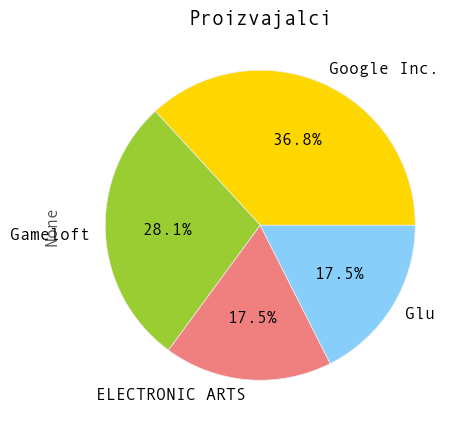

In [141]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']

proizvajalci[tabela.groupby('proizvajalec').size()>=20]\
.plot(kind='pie', figsize=(5,5), fontsize=12, title = "Proizvajalci", colors = colors, autopct='%1.1f%%')

In [18]:
proizvajalec = tabela.groupby('proizvajalec')[['ocena','stevilo_ocen']].mean().sort_values('ocena', ascending = False)
proizvajalec

,ocena,stevilo_ocen
proizvajalec,,
Reyfasoft,4.779000,466971
Yousician Ltd.,4.750000,663018
Game Hive Corporation,4.745000,1239143
NEEZEN,4.729000,830080
Peak Games,4.724333,1118006
MrRocco,4.719000,435445
Kunooz.,4.714000,286919
TaoGames Limited,4.701000,244068
"Twitch Interactive, Inc.",4.699000,1176970


In [19]:
proizvajalec.loc['Google Inc.']

ocena           4.140857e+00
stevilo_ocen    1.742680e+06
Name: Google Inc., dtype: float64

Očitno je proizvajalec z največ uspešnimi aplikacijami Google Inc. saj se je kar 42 njegovih aplikacij uvrstilo med največkrat prenešene. Z 10 aplikacijami manj mu sledi Gameloft. ELECTRONIC ARTS in Glu imasta na seznamu vsak 20 aplikacij, vsi ostali pa manj kot 20. 
Kljub velikemu številu aplikacij ti proizvajalci nimajo najboljše skupne ocene aplikacij. Google Inc. ima skupno oceno približno 4,14. Najvišjo povprečno ocene aplikacij pa ima Reyfasoft in sicer 4,779, najnižjo pa Blurb Inc. le 1,521.
Vendar pa se iz zadnje tabele vidi da je število ocen za posamezne aplikacije zelo različno, torej tudi to vpliva na oceno.

# Kategorija
Sedaj pa si oglejmo katere kategorije spadajo med najbolj priljubljene in kakšne so povprečne ocene aplikacij iz posameznih kategorij.

Najprej združimo osnovno tabelo s tabelo nadkategorij.

In [90]:
tabela2 = pd.merge(tabela, nadkategorije)
tabela2

,proizvajalec,kategorija,stevilo_ocen,ocena,prenosi,nadkategorija
0,Nimbuzz Netherlands BV,Social,403020,4.211,10000000,Social
1,Ask.fm,Social,1157764,4.106,50000000,Social
2,Badoo,Social,2944295,4.328,100000000,Social
3,BeeTalk Private Ltd,Social,817559,4.078,10000000,Social
4,BIGO TECHNOLOGY PTE. LTD.,Social,403970,4.101,10000000,Social
5,Wamba,Social,224251,4.186,10000000,Social
6,Facebook,Social,282053,4.138,10000000,Social
7,Facebook,Social,3286185,4.175,100000000,Social
8,Facebook,Social,52859343,4.000,1000000000,Social
9,Family Safety Production,Social,246064,4.145,10000000,Social


In [91]:
tabela2.groupby('nadkategorija')[['ocena']].mean().sort_values('ocena', ascending = False)

,ocena
nadkategorija,
Parenting,4.628000
Education,4.558667
Lifestyle,4.432650
Comics,4.429000
Weather,4.410667
Personalization,4.377605
Books and Reference,4.366700
Tools,4.344616
Travel and Local,4.329524


In [92]:
kategorije = tabela2.groupby('nadkategorija').size().sort_values(ascending=False)
kategorije[tabela2.groupby('nadkategorija').size()>50]

nadkategorija
Games              749
Tools              138
Photography         80
Sports              71
Communication       62
Productivity        59
Music and Audio     56
Social              54
Entertainment       54
dtype: int64

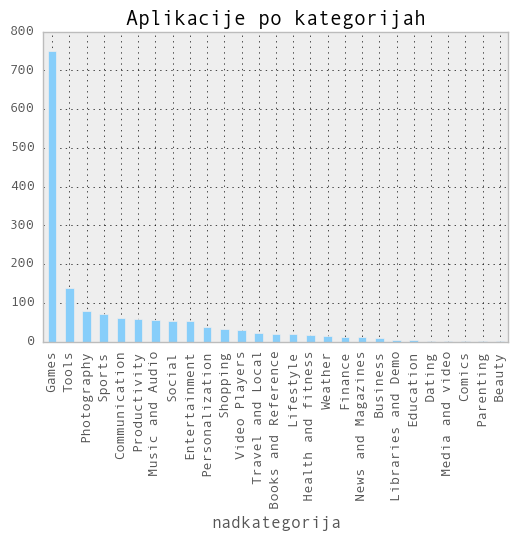

In [152]:
kategorije.plot(kind = 'bar', color='lightskyblue', title = "Aplikacije po kategorijah")

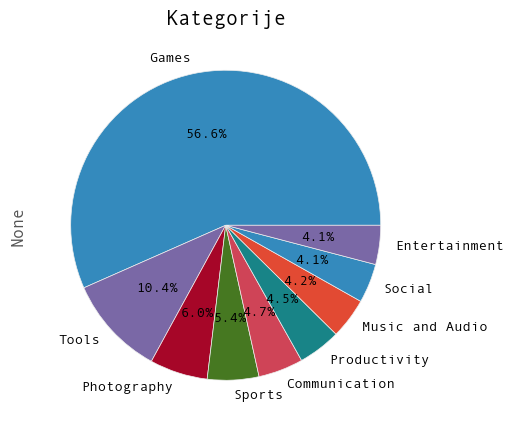

In [88]:
kategorije[tabela2.groupby('nadkategorija').size()>=50]\
.plot(kind = 'pie', figsize = (5,5), title = "Kategorije", autopct='%1.1f%%')

Kategorija z najboljšo povprečno oceno aplikacij je 'Parenting'. Vendar če si ogledamo katere kategorije imajo največje število aplikacij, vidimo da te in še nekaj prvih kategorij glede na oceno ni med njimi. Torej imajo te kategorije majhno število popularnih aplikacij, so pa le te aplikacije dobro ocenjene.

Kategorija z največ popularnimi aplikacijami je 'Games' (igre) s kar 749 aplikacijami (skoraj polovica vseh aplikacij) na seznamu, kar se zelo dobro vidi iz zgornjih grafov. Naslednja popularna kategorija s preko 100 aplikacijami je 'Tools' (pripomočki), ostale pa imajo na seznamu manj kot 100 aplikacij.

# Povezava med ocenami in prenosi

Sedaj pa si poglejmo kakšna je povezava med ocenami, stevilom_ocen in prenosi.
Za potrebe te analizo bom v tabelo s podatki o aplikacijah dodali še en stolpec ki prikazuje delež ocen glede na število prenosov. Nato pa podatke razvrstili najprej po prenosih in nadaljno glede na ta delež, saj so podatki z večjim številom ocen glede na prenose bolj zanesljivi.

In [107]:
tabela['delez'] = tabela['stevilo_ocen']/tabela['prenosi'] * 100
tabela_ocen = tabela[['ocena','prenosi','stevilo_ocen','delez']].sort_values(['prenosi','delez','ocena'], ascending=False)
tabela_ocen

,ocena,prenosi,stevilo_ocen,delez
ime,,,,
Facebook,4.000,1000000000,52859343,5.285934
WhatsApp Messenger,4.423,1000000000,45945689,4.594569
Instagram,4.502,1000000000,39618914,3.961891
YouTube,4.163,1000000000,13385161,1.338516
Maps - Navigation &amp; Transit,4.328,1000000000,6807950,0.680795
Chrome Browser - Google,4.240,1000000000,6001853,0.600185
Google,4.375,1000000000,4262129,0.426213
Google Play Games,4.127,1000000000,3737724,0.373772
Gmail,4.315,1000000000,3159183,0.315918


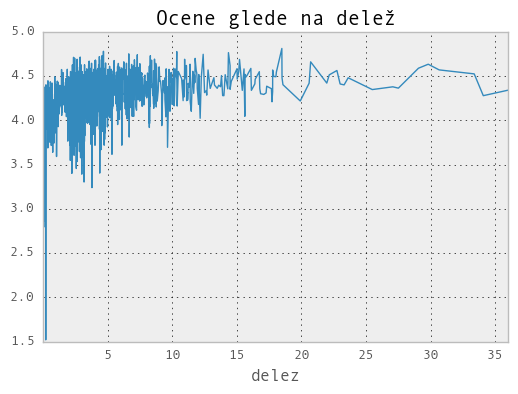

In [153]:
tabela_ocen.groupby('delez').mean()['ocena'].plot(title = 'Ocene glede na delež')

Iz zgornjega grafa je razvidno da ocene pri manjšem deležu precej nihajo in so malenkost nižje, saj na primer nobena aplikacija z deležem večjim od 5% ne seže pod oceno 3,5, tiste z deležem večjim od 10% pa imajo celo vse oceno višjo od 4. Medtem pa je precej aplikacij z nižjim deležem pod to mejo.

In [143]:
tabela3 = tabela.groupby('prenosi').mean()[['ocena']]
tabela3

,ocena
prenosi,
10000000,4.276858
50000000,4.245762
100000000,4.295269
500000000,4.326462
1000000000,4.122053


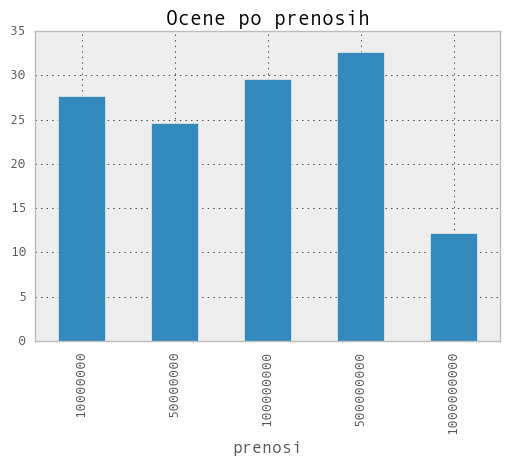

In [154]:
(((tabela3.ocena) - 4) * 100).plot(kind = 'bar', title = "Ocene po prenosih")

Zgornji graf prikazuje, da imajo aplikacije z največjim številom prenosov najnižjo skupno oceno.

In [156]:
tabela4 = tabela.join(ocene)
tabela5 = tabela4[(tabela4.ocena1 < tabela4.ocena5)]
tabela5

,proizvajalec,kategorija,stevilo_ocen,ocena,prenosi,delez,ocena1,ocena2,ocena3,ocena4,ocena5
ime,,,,,,,,,,,
Beaming Service for Samsung,Mobeam Inc.,Productivity,95396,2.862,100000000,0.095396,34905,7793,5873,2903,43922
Blurb Checkout,Blurb Inc.,Photography,202449,1.521,100000000,0.202449,20694,3855,3982,3188,170730
Briefing for Samsung (Update),Flipboard,News and Magazines,23486,2.794,50000000,0.046972,7756,2326,1559,1023,10822
Verizon Tones,Verizon - VZ,Entertainment,36804,2.958,50000000,0.073608,12299,5004,3173,1510,14818


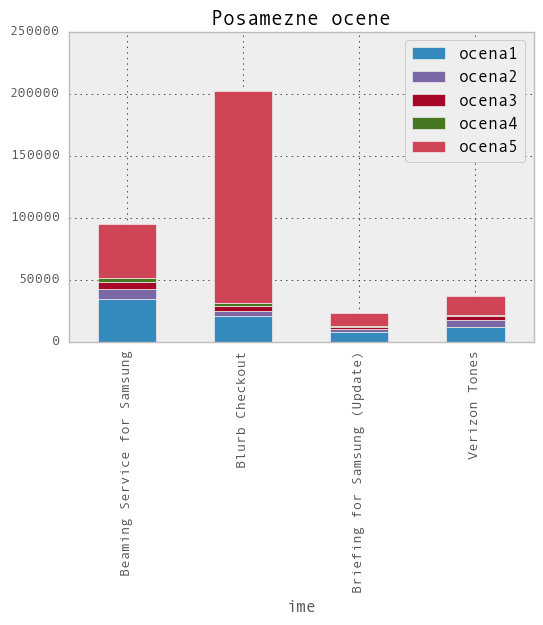

In [157]:
 tabela5[['ocena1','ocena2','ocena3','ocena4','ocena5']].plot(kind = 'bar', stacked = True, title = "Posamezne ocene")

Zgornja tabela prikazuje aplikacije, ki imajo več ocen enakih 5 kot 1. Takšne aplikacije so le 4 (od 1500). In kljub tem odnosu med oceno 1 in 5 imajo vse povprečno oceno manjšo od 3.
Graf pa prikazuje podatke o posamenih ocenah teh aplikacij. Iz grafa je razvidno, da ima aplikacija Blurb Checkout veliko večje število ocen 5 kot 1, medtem ko pri ostalih na prvi pogled ni velike razlike med tema ocenama.

# Najbolj popularna aplikacija

Za zaključek poiščimo najbolj polpularno aplikacijo.

In [127]:
tabela6 = tabela.sort_values(['prenosi','ocena'], ascending = False).head()
tabela6

,proizvajalec,kategorija,stevilo_ocen,ocena,prenosi,delez
ime,,,,,,
Instagram,Instagram,Social,39618914,4.502,1000000000,3.961891
WhatsApp Messenger,WhatsApp Inc.,Communication,45945689,4.423,1000000000,4.594569
Google,Google Inc.,Tools,4262129,4.375,1000000000,0.426213
Maps - Navigation &amp; Transit,Google Inc.,Travel and Local,6807950,4.328,1000000000,0.680795
Google Drive,Google Inc.,Productivity,1484903,4.321,1000000000,0.148490


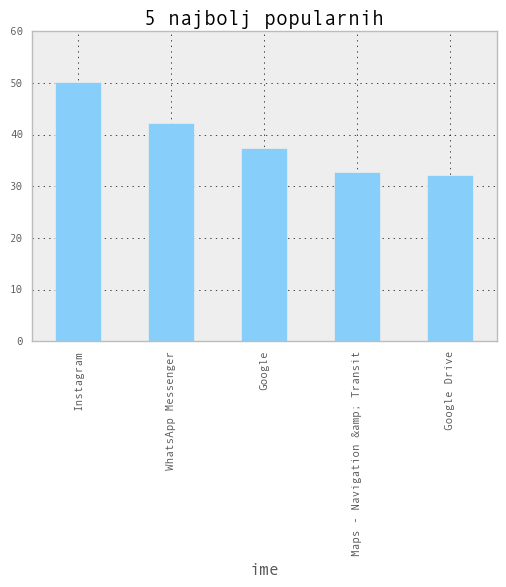

In [139]:
(((tabela6.ocena)-4)*100).plot(kind = 'bar', fontsize=8,title= "5 najbolj popularnih",color='lightskyblue')

In [142]:
tabela6.groupby('proizvajalec').size()

proizvajalec
Google Inc.      3
Instagram        1
WhatsApp Inc.    1
dtype: int64

Aplikacija z največjim številom prenosov in najboljšo oceno je Instagram (iz kategorije Social) z oceno 4.502. Torej je glede na naše kriterija to najbolj popularna aplikacija. Ostale 4 aplikacije so vsaka iz različne kategorij.
Kar 3 od 5 aplikacij na seznamu najboljših pa so istega proizvajalca - Google Inc. Torej bi lahko rekli da je to najuspešnejši proizvajalec.